# CS221 Scikit-learn Tutorial
By: Chuma Kabaghe

Link to many more tutorials: https://scikit-learn.org/stable/tutorial/


In [1]:
import sklearn
import numpy as np
import seaborn as sns

**Loading a Dataset**

scikit-learn comes with a few standard datasets. We use the iris flower dataset.

In [4]:
from sklearn.datasets import load_iris
X = load_iris().data
y = load_iris().target
print ('X dimensions: ', X.shape)
print ('y dimensions: ', y.shape)

X dimensions:  (150, 4)
y dimensions:  (150,)


In [7]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

It contains 150 training examples each with four features: length of sepals, width of sepals, length of petals and width of petals. The labels take on one of three values corresponding to the three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

<AxesSubplot:ylabel='count'>

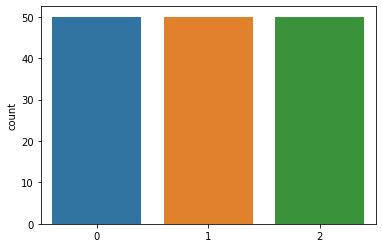

In [9]:
sns.countplot(y)

**Split into Train and Test Sets**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## k Nearest Neighbor

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [15]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [16]:
np.mean(y_pred == y_test)

0.98

Plot a confusion matrix to visualize misclassifications

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


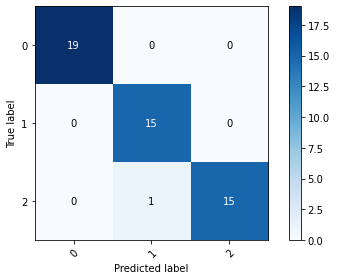

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print(cm)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=[0,1,2], yticklabels=[0,1,2],
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter=150)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [41]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

Calculate the accuracy

In [42]:
np.mean(y_pred == y_test)

1.0

## Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=5)

In [44]:
scores

array([1.  , 0.85, 0.95, 1.  , 0.95])

In [45]:
np.mean(scores)

0.95